In [1]:
import numpy as np
import pandas as pd
from divination import Divination

In [2]:
dates = [np.datetime64('2020-01-01') + np.timedelta64(idx, 'D') for idx in range(1024)]
sin = np.sin(np.linspace(0, 4 * 2 * np.pi, len(dates))) + np.random.normal(size=len(dates))
cos = np.cos(np.linspace(0, 4 * 2 * np.pi, len(dates))) + np.random.normal(size=len(dates))
combined = sin + cos

In [3]:
data = pd.DataFrame.from_dict({
    'date': dates,
    'sin': sin,
    'cos': cos,
    'combined': combined
}).set_index('date')
data

,sin,cos,combined
date,,,
2020-01-01,0.136100,0.447958,0.584058
2020-01-02,-0.330583,1.660135,1.329552
2020-01-03,-1.590218,-0.058730,-1.648949
2020-01-04,0.848038,0.215322,1.063360
2020-01-05,0.276219,1.106985,1.383204
...,...,...,...
2022-10-16,1.476459,1.590228,3.066687
2022-10-17,-2.122544,1.215464,-0.907080
2022-10-18,-0.250995,1.025309,0.774314


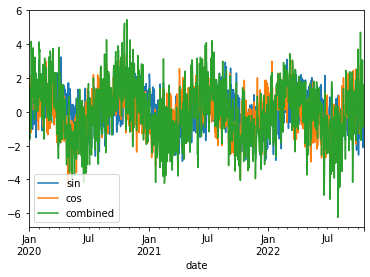

In [4]:
data.plot()

In [5]:
predictions = Divination(periods=8).fit(data).predict(data, num_steps=256)
predictions

,sin,cos,combined
date,,,
2020-01-01,0.136100,0.447958,0.584058
2020-01-02,-0.330583,1.660135,1.329552
2020-01-03,-1.590218,-0.058730,-1.648949
2020-01-04,0.848038,0.215322,1.063360
2020-01-05,0.276219,1.106985,1.383204
...,...,...,...
2023-06-29,0.034452,0.786729,0.821181
2023-06-30,0.054030,0.785271,0.839302
2023-07-01,0.073474,0.783350,0.856823


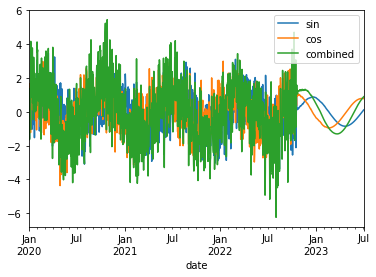

In [6]:
predictions.plot()